<a href="https://colab.research.google.com/github/beyzoskaya/PyTorch_deepLearning/blob/main/extras/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch

In [3]:
import torch
import torchvision
import torchaudio

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15994, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15994 (delta 18), reused 18 (delta 12), pack-reused 15967
Receiving objects: 100% (15994/15994), 14.58 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (10984/10984), done.


In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
WARNING ⚠️ invalid check_version(5.9.5, ) requested, please check values.
YOLOv5 🚀 2023-9-24 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [12]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [13]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 449.6ms pre-process, 3451.3ms inference, 38.7ms NMS per image at shape (1, 3, 384, 640)


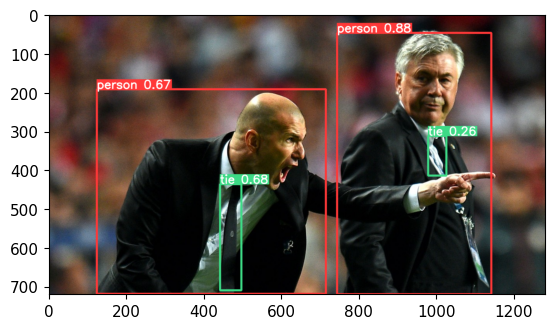

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

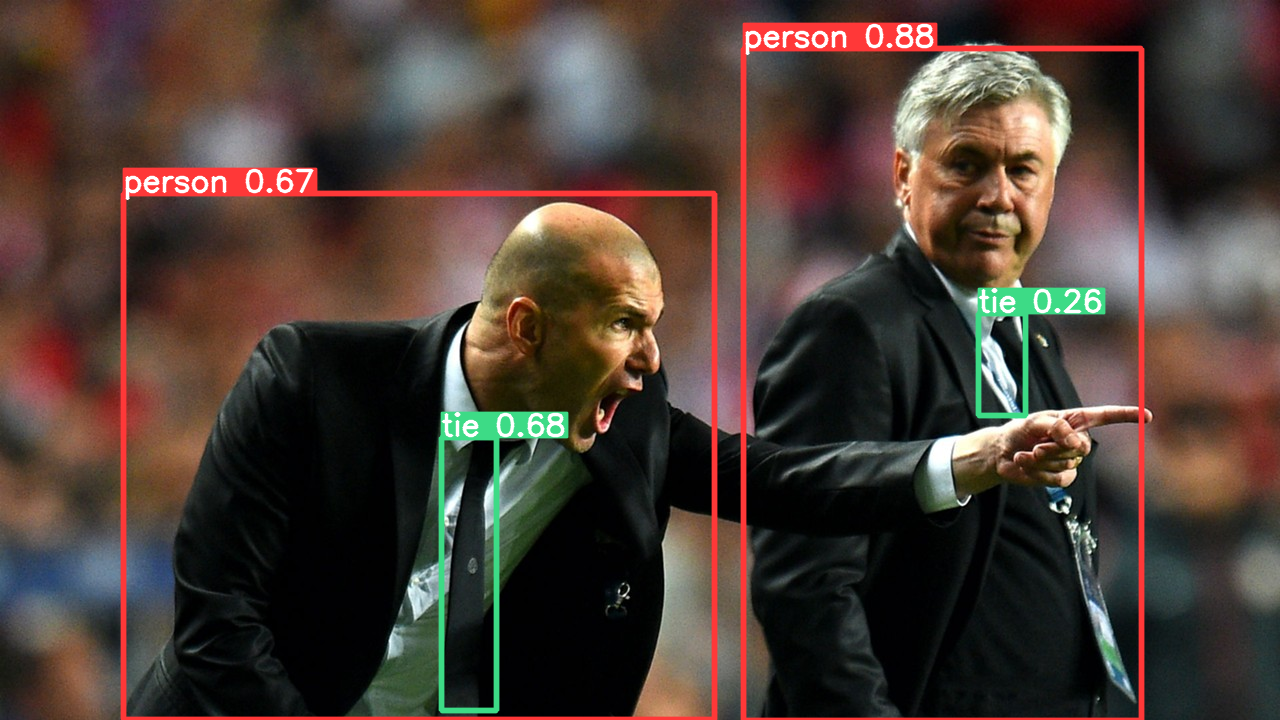

In [15]:
results.show()

In [19]:
np.array(results.render()).shape

(1, 720, 1280, 3)

In [24]:
img_2 = 'https://media.cntraveler.com/photos/53e2f41cdddaa35c30f66775/16:9/w_1600,c_limit/highway-traffic.jpg'

In [25]:
results_2 = model(img_2)
results_2.print()

image 1/1: 768x1024 14 persons, 34 cars, 1 motorcycle, 1 truck
Speed: 383.4ms pre-process, 72.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


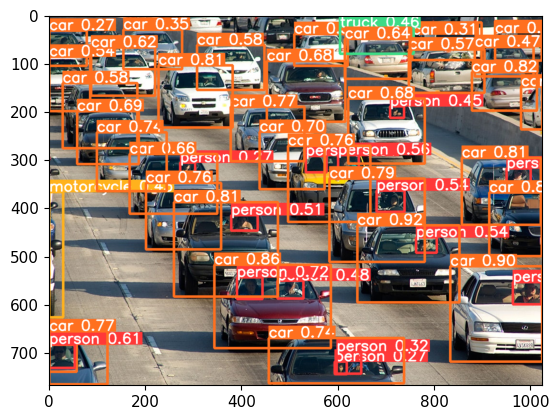

In [26]:
%matplotlib inline
plt.imshow(np.squeeze(results_2.render()))
plt.show()

In [29]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  results = model(frame)

  cv2.imshow('YOLO', np.squeeze(results.render()))
  if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [30]:
import uuid
import os
import time

In [32]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [37]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

error: ignored

In [36]:
for label in labels:
  print(label)
  for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

awake
data/images/awake.829480ea-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/awake.82948b94-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/awake.82948dc4-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/awake.82948f9a-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/awake.8294915c-5ad3-11ee-b68a-0242ac1c000c.jpg
drowsy
data/images/drowsy.8294938c-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/drowsy.82949544-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/drowsy.82949706-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/drowsy.829498aa-5ad3-11ee-b68a-0242ac1c000c.jpg
data/images/drowsy.82949a44-5ad3-11ee-b68a-0242ac1c000c.jpg


In [38]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 41.88 MiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [39]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.5 MB/s eta 0:00:00


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2